# Heart Risk Predication of individuals

In this notebook, we use the Heart Risk dataset from kaggle and use it to predict the risk of heart failure for individuals based on various characteristis. For the first part of the notebook, I have done basic EDA and used Naive Bayes Classifier to predict Heart Risk. Later I have balanced the dataset by oversampling because the target class was highly imbalanced.

#### Notebook created by Harshal Sarode (H00383238) for DMML Portfolio

## Importing data and loading libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
assert sklearn.__version__ <= "v0.23.0"
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import plotly
import plotly.graph_objs as go
import pydot
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from fastai.vision import *
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('heartRisk.csv')
data_copy = data.copy(deep=True)
data.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


### EDA and Data Visualization

array([[<AxesSubplot:title={'center':'isMale'}>, <AxesSubplot:title={'center':'isBlack'}>,
        <AxesSubplot:title={'center':'isSmoker'}>],
       [<AxesSubplot:title={'center':'isDiabetic'}>, <AxesSubplot:title={'center':'isHypertensive'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Systolic'}>, <AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'HDL'}>],
       [<AxesSubplot:title={'center':'Risk'}>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

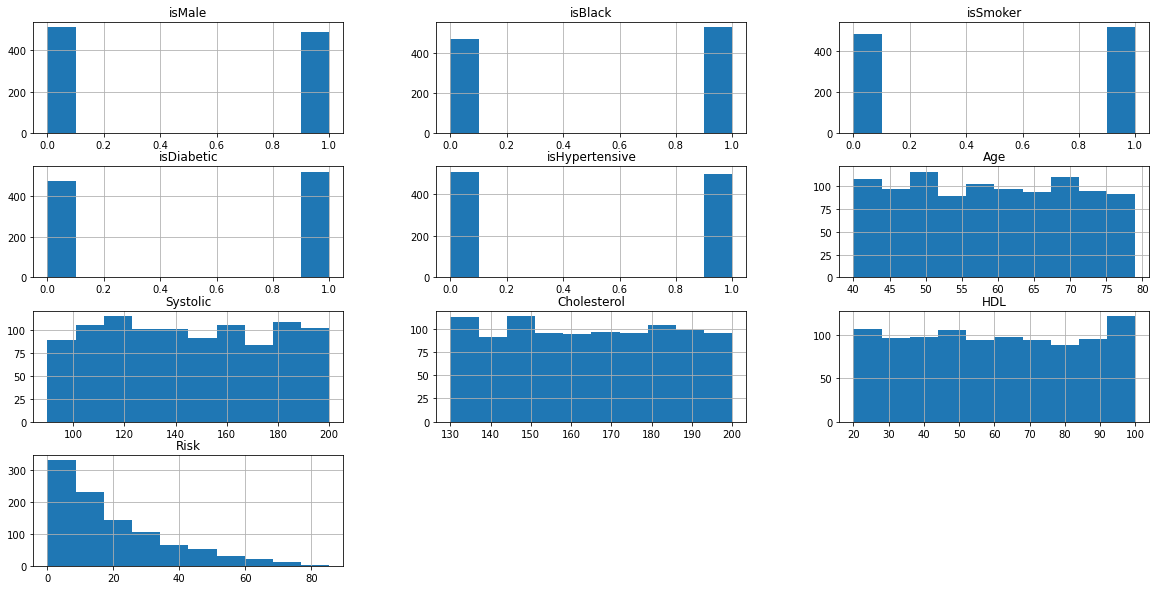

In [3]:
data.hist(bins = 10, figsize = (20,10))

<AxesSubplot:>

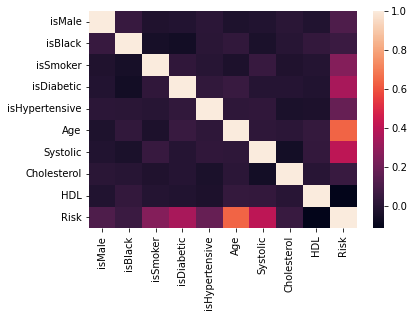

In [4]:
correlation = data.corr()
sns.heatmap(correlation)

<AxesSubplot:xlabel='Age', ylabel='Risk'>

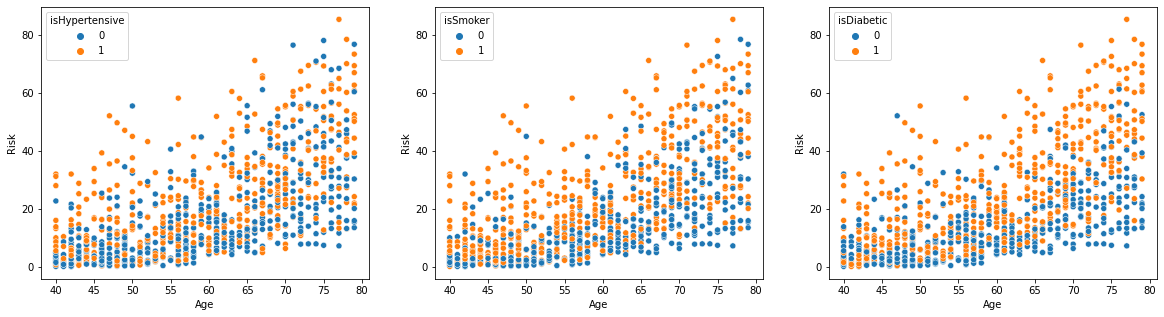

In [5]:
figure, axes = plt.subplots(ncols=3, figsize = (20,5))
sns.scatterplot(data=data, x="Age", y="Risk", hue="isHypertensive", ax = axes[0])
sns.scatterplot(data=data, x="Age", y="Risk", hue="isSmoker", ax = axes[1])
sns.scatterplot(data=data, x="Age", y="Risk", hue="isDiabetic", ax = axes[2])

In [6]:
data.isnull().sum()

isMale            0
isBlack           0
isSmoker          0
isDiabetic        0
isHypertensive    0
Age               0
Systolic          0
Cholesterol       0
HDL               0
Risk              0
dtype: int64

We dont have any null values.

### Binning the Data

<AxesSubplot:xlabel='Risk', ylabel='count'>

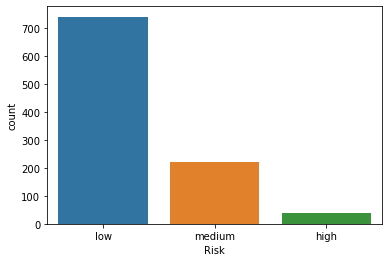

In [7]:
bins = np.linspace(0, 86,4)
labels = ['low', 'medium', 'high']
data['Risk'] = pd.cut(data['Risk'], bins=bins, labels=labels, include_lowest=True)
sns.countplot(x='Risk', data = data)

We can see that our data is not balanced, low risk has higher number of data points and is biased

### Data Preparation

In [8]:
encoder = preprocessing.LabelEncoder()
data['Risk'] = encoder.fit_transform(data['Risk'])
x = data.iloc[:,:9]
y = data['Risk']

## Balancing Dataset by Over sampling

In [9]:
from imblearn.combine import SMOTETomek
over_sample = SMOTETomek(random_state = 10)
x_os, y_os = over_sample.fit_resample(x, y)
x_os['Risk'] = y_os
dataset_os = x_os.copy(deep=True)
x_os.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,1
1,0,0,0,1,1,69,167,155,59,2
2,0,1,1,1,1,50,181,147,59,2
3,1,1,1,1,0,42,145,166,46,1
4,0,0,1,0,1,66,134,199,63,1


<AxesSubplot:xlabel='Risk', ylabel='count'>

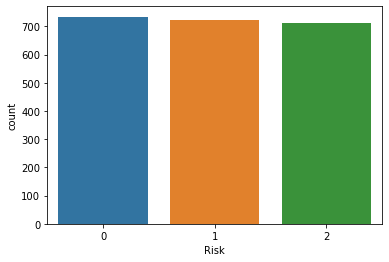

In [10]:
sns.countplot(x='Risk', data = x_os)

Now we can see that our target class is balanced and thus will result in a better model that is not overfitted and biased to the "Low Risk" category.

### Train Test Split

In [11]:
x_os_copy = x_os.copy(deep = True)
x_os = x_os.drop(['Risk'], axis = 1)
x_os_train, x_os_test, y_os_train, y_os_test = train_test_split(x_os, y_os, test_size = 0.2, random_state = 10)

### Model Training & Evaluation

In [12]:
model_gnb = GaussianNB(var_smoothing = 1e-10)
model_gnb.fit(x_os_train, y_os_train)
y_pred  =  model_gnb.predict(x_os_test)
ac = accuracy_score(y_os_test,y_pred)
print("The accuray of the model is: {:0.2f}%".format(ac * 100))
precision, recall, f_score, support = precision_recall_fscore_support(y_os_test, y_pred, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100))

The accuray of the model is: 76.27%
The model's Precision is: 76.72%
The model's Recall is: 76.27%
The model's F-Score is: 76.27%


### Running on KNN Classifer

In [13]:
model_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', p = 1)
model_knn.fit(x_os_train, y_os_train)
y_pred  =  model_knn.predict(x_os_test)
ac = accuracy_score(y_os_test,y_pred)
print("The accuray of the model is: {:0.2f}%".format(ac * 100))
precision, recall, f_score, support = precision_recall_fscore_support(y_os_test, y_pred, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100))

The accuray of the model is: 84.79%
The model's Precision is: 86.76%
The model's Recall is: 84.79%
The model's F-Score is: 84.68%


Before hyperparameter tuning my accuracy was 81%

## Data Preparation by attribute Selection

<AxesSubplot:>

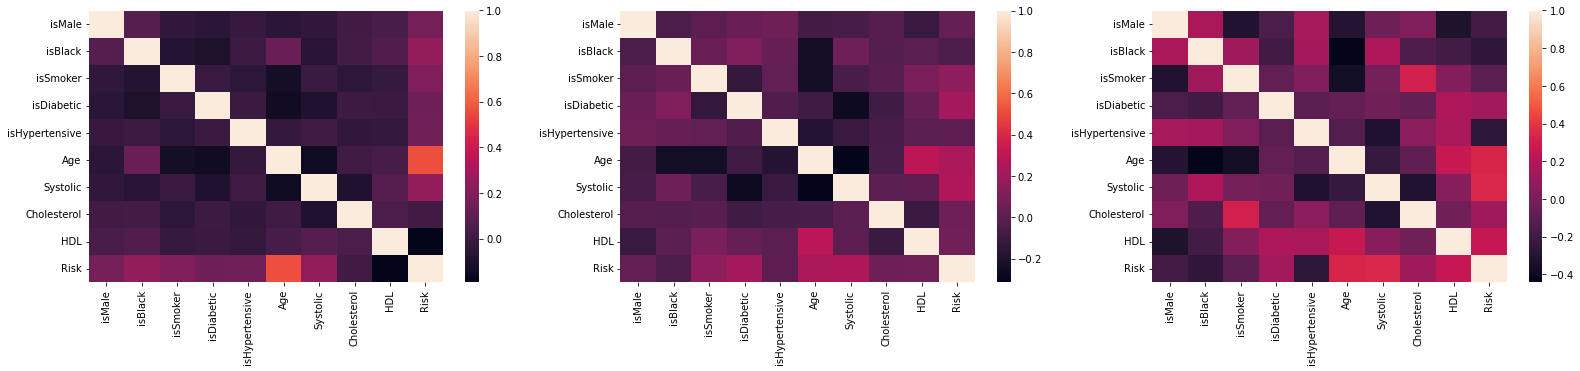

In [14]:
dataset_low = data_copy[data_copy['Risk'] < bins[1]]
dataset_medium = data_copy[(data_copy['Risk'] > bins[1]) & (data_copy['Risk'] < bins[2])]
dataset_high = data_copy[(data_copy['Risk'] > bins[2]) & (data_copy['Risk'] < bins[3])]

fig, axs = plt.subplots(ncols=3, figsize = (27,5))
sns.heatmap(dataset_low.corr(), ax = axs[0])
sns.heatmap(dataset_medium.corr(), ax = axs[1])
sns.heatmap(dataset_high.corr(), ax = axs[2])

Age and Systolic are the top 2 most correlated features for each of the three output classes.
Age, Systolic, isBlack, HDL are the top 3 most correlated features for each of the three output classes
Age, Systolic, isBlack, isDiabetic, isSmoker, Cholesterol are the top 4 most correlated features for each of the three output classes

### Feature Selection

In [15]:
dataset_os_1_x = dataset_os[['Age', 'Systolic']]
dataset_os_1_y = dataset_os['Risk']

dataset_os_2_x = dataset_os[['Age', 'Systolic', 'isBlack', 'HDL', 'isDiabetic']]
dataset_os_2_y = dataset_os['Risk']

dataset_os_3_x = dataset_os[['Age', 'Systolic', 'isBlack', 'isDiabetic', 'isSmoker', 'Cholesterol']] 
dataset_os_3_y = dataset_os['Risk']

In [16]:
dataset_os_1_x.head()

,Age,Systolic
0,49,101
1,69,167
2,50,181
3,42,145
4,66,134


In [17]:
dataset_os_2_x.head()

,Age,Systolic,isBlack,HDL,isDiabetic
0,49,101,1,32,1
1,69,167,0,59,1
2,50,181,1,59,1
3,42,145,1,46,1
4,66,134,0,63,0


In [18]:
dataset_os_3_x.head()

,Age,Systolic,isBlack,isDiabetic,isSmoker,Cholesterol
0,49,101,1,1,0,181
1,69,167,0,1,0,155
2,50,181,1,1,1,147
3,42,145,1,1,1,166
4,66,134,0,0,1,199


### Data Preparation

In [19]:
x_train_1 , x_test_1, y_train_1, y_test_1 = train_test_split(dataset_os_1_x, dataset_os_1_y, test_size = 0.2, random_state = 32)

x_train_2 , x_test_2, y_train_2, y_test_2 = train_test_split(dataset_os_2_x, dataset_os_2_y, test_size = 0.2, random_state = 32)

x_train_3 , x_test_3, y_train_3, y_test_3 = train_test_split(dataset_os_3_x, dataset_os_3_y, test_size = 0.2, random_state = 32)

### Model Training & Evaluation with attribute selection

### Running on GaussianNB

In [20]:
print('Model 1 Evlauation: ')
model_gnb.fit(x_train_1, y_train_1)
y_pred_1  =  model_gnb.predict(x_test_1)
ac_1 = accuracy_score(y_test_1,y_pred_1)
print("The accuray of the model is: {:0.2f}%".format(ac_1 * 100))
precision, recall, f_score, support = precision_recall_fscore_support(y_test_1, y_pred_1, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100))

print('\nModel 2 Evlauation: ')
model_gnb.fit(x_train_2, y_train_2)
y_pred_2  =  model_gnb.predict(x_test_2)
ac_2 = accuracy_score(y_test_2,y_pred_2)
print("The accuray of the model is: {:0.2f}%".format(ac_2 * 100))
precision, recall, f_score, support = precision_recall_fscore_support(y_test_2, y_pred_2, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100))

print('\nModel 3 Evlauation: ')
model_gnb.fit(x_train_3, y_train_3)
y_pred_3  =  model_gnb.predict(x_test_3)
ac_3 = accuracy_score(y_test_3,y_pred_3)
print("The accuray of the model is: {:0.2f}%".format(ac_3 * 100))
precision, recall, f_score, support = precision_recall_fscore_support(y_test_3, y_pred_3, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100), '\n')

Model 1 Evlauation: 
The accuray of the model is: 67.74%
The model's Precision is: 67.57%
The model's Recall is: 67.74%
The model's F-Score is: 67.12%

Model 2 Evlauation: 
The accuray of the model is: 72.35%
The model's Precision is: 72.49%
The model's Recall is: 72.35%
The model's F-Score is: 72.14%

Model 3 Evlauation: 
The accuray of the model is: 74.19%
The model's Precision is: 74.20%
The model's Recall is: 74.19%
The model's F-Score is: 74.05% 



### Running on KNN Classifier

In [21]:
print('Model 1 Evlauation: ')
model_knn.fit(x_train_1, y_train_1)
y_pred_1  =  model_knn.predict(x_test_1)
cm_1 = confusion_matrix(y_test_1, y_pred_1)
ac_1 = accuracy_score(y_test_1,y_pred_1)
print("The accuray of the model is: {:0.2f}%".format(ac_1 * 100))
print("The confusion matrix is: \n", cm_1)
precision, recall, f_score, support = precision_recall_fscore_support(y_test_1, y_pred_1, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100))

print('\nModel 2 Evlauation: ')
model_knn.fit(x_train_2, y_train_2)
y_pred_2  =  model_knn.predict(x_test_2)
cm_2 = confusion_matrix(y_test_2, y_pred_2)
ac_2 = accuracy_score(y_test_2,y_pred_2)
print("The accuray of the model is: {:0.2f}%".format(ac_2 * 100))
print("The confusion matrix is: \n", cm_2)
precision, recall, f_score, support = precision_recall_fscore_support(y_test_2, y_pred_2, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100))

print('\nModel 3 Evlauation: ')
model_knn.fit(x_train_3, y_train_3)
y_pred_3  =  model_knn.predict(x_test_3)
cm_3 = confusion_matrix(y_test_3, y_pred_3)
ac_3 = accuracy_score(y_test_3,y_pred_3)
print("The accuray of the model is: {:0.2f}%".format(ac_3 * 100))
print("The confusion matrix is: \n", cm_3)
precision, recall, f_score, support = precision_recall_fscore_support(y_test_3, y_pred_3, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100), '\n')

Model 1 Evlauation: 
The accuray of the model is: 73.50%
The confusion matrix is: 
 [[141   4  10]
 [  6  97  36]
 [ 31  28  81]]
The model's Precision is: 72.95%
The model's Recall is: 73.50%
The model's F-Score is: 73.00%

Model 2 Evlauation: 
The accuray of the model is: 82.95%
The confusion matrix is: 
 [[149   0   6]
 [  4  92  43]
 [ 15   6 119]]
The model's Precision is: 84.59%
The model's Recall is: 82.95%
The model's F-Score is: 82.74%

Model 3 Evlauation: 
The accuray of the model is: 83.41%
The confusion matrix is: 
 [[153   0   2]
 [  2 102  35]
 [ 25   8 107]]
The model's Precision is: 84.03%
The model's Recall is: 83.41%
The model's F-Score is: 83.17% 



Dataset 2 works very well as compared to both datasets and is smaller than our original dataset but gets us nearly the same accuracy as dataset 3.

# Part 2 Clustering

### Applying PCA for visualization and clustering algorithms

In [22]:
from sklearn.decomposition import PCA
dim_reduction = PCA(n_components=2)
pca_dataset = dim_reduction.fit_transform(dataset_os_2_x)
pca_dataset = pd.DataFrame(pca_dataset, columns = ['pca1', 'pca2'])
pca_dataset = np.array(pca_dataset)

### Standardizing columns

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


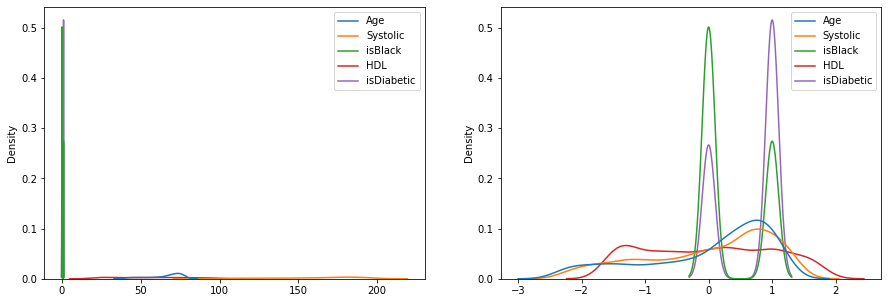

In [23]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.kdeplot(data = dataset_os_2_x, ax = axes[0])
axs[0].title.set_text('Distribution of features before Scaling')

scaler = StandardScaler()
dataset_os_2_x.loc[:,['Age', 'Systolic', 'HDL']] = scaler.fit_transform(dataset_os_2_x.loc[:,['Age', 'Systolic', 'HDL']])

sns.kdeplot(data = dataset_os_2_x, ax = axes[1])
axs[1].title.set_text('Distribution of features after Scaling')

x_train_2 , x_test_2, y_train_2, y_test_2 = train_test_split(pca_dataset, dataset_os_2_y, test_size = 0.2, random_state = 32)

### Analysing best parameters for Clustering

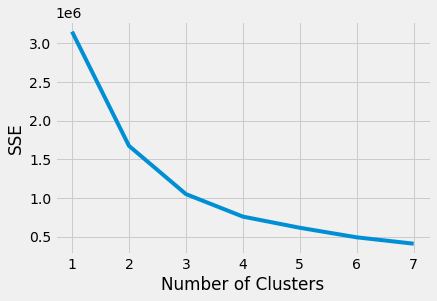

In [25]:
sse = []
max_no_clusters = 8
for k in range(1, max_no_clusters):
    model_kmean = KMeans(n_clusters=k, random_state = 400)
    model_kmean.fit(pca_dataset)
    sse.append(model_kmean.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, max_no_clusters), sse)
plt.xticks(range(1, max_no_clusters))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [26]:
from kneed import KneeLocator
knee_elbow = KneeLocator(range(1, max_no_clusters), sse, curve="convex", direction="decreasing")
knee_elbow.elbow

3

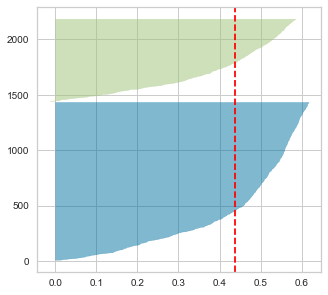

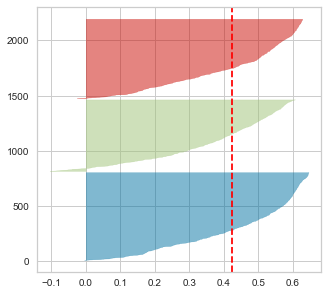

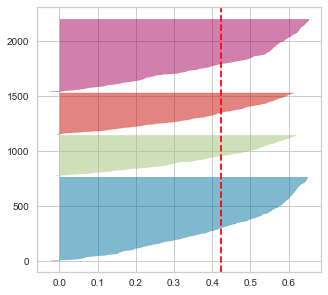

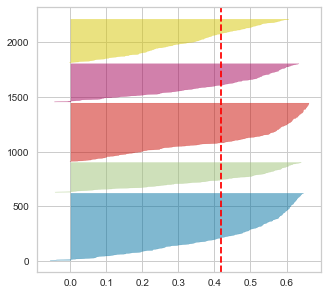

In [28]:
from sklearn.utils import safe_indexing
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(4):
    model_kmean = KMeans(n_clusters = i+2, random_state = 400)
    model_kmean.fit(pca_dataset)
    kmeans_silhouette = silhouette_score(pca_dataset, model_kmean.labels_).round(2)
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,i+1)
    visualizer = SilhouetteVisualizer(model_kmean, colors='yellowbrick')
    visualizer.fit(pca_dataset)
    plt.show()

#### From above illustration we can safely assume that the KMeans clustering works best with 3 clusters.

### Kmeans Clustering

In [29]:
model_kmean = KMeans(n_clusters = 3, random_state = 400)
model_kmean.fit(pca_dataset)
y_pred_2  =  model_kmean.predict(x_test_2)
ac_2 = accuracy_score(y_test_2,y_pred_2)
print("The accuray of the model is: {:0.2f}%".format(ac_2 * 100))
precision, recall, f_score, support = precision_recall_fscore_support(y_test_2, y_pred_2, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100))

The accuray of the model is: 50.46%
The model's Precision is: 51.06%
The model's Recall is: 50.46%
The model's F-Score is: 50.63%


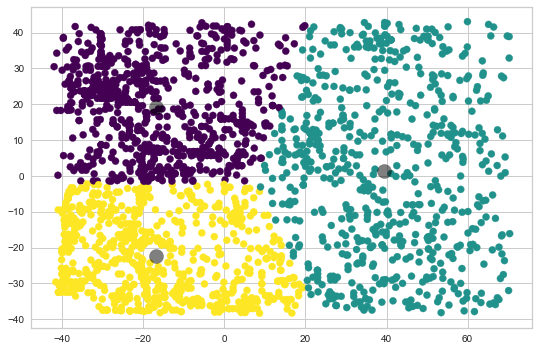

In [30]:
y_pred = model_kmean.predict(pca_dataset)
plt.scatter(pca_dataset[:, 0], pca_dataset[:, 1], c=y_pred, s=50, cmap='viridis')
centers = model_kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### EM Soft Clustering

In [31]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=480)
gm.fit(pca_dataset)
y_pred_2  =  gm.predict(x_test_2)
ac_2 = accuracy_score(y_test_2,y_pred_2)
print("The accuray of the model is: {:0.2f}%".format(ac_2 * 100))
precision, recall, f_score, support = precision_recall_fscore_support(y_test_2, y_pred_2, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100))

The accuray of the model is: 18.20%
The model's Precision is: 19.71%
The model's Recall is: 18.20%
The model's F-Score is: 18.64%


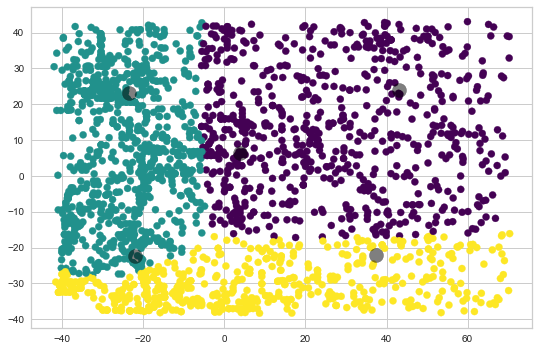

In [32]:
y_pred = gm.predict(pca_dataset)
plt.scatter(pca_dataset[:, 0], pca_dataset[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Heirarchical Clustering

In [33]:
heir_clustering = AgglomerativeClustering(n_clusters=3, compute_full_tree=True)
y_pred = heir_clustering.fit_predict(x_test_2)
ac_2 = accuracy_score(y_test_2,y_pred)
print("The accuray of the model is: {:0.2f}%".format(ac_2 * 100))
precision, recall, f_score, support = precision_recall_fscore_support(y_test_2, y_pred, average='weighted')
print("The model's Precision is: {:0.2f}%".format(precision * 100))
print("The model's Recall is: {:0.2f}%".format(recall * 100))
print("The model's F-Score is: {:0.2f}%".format(f_score * 100))

The accuray of the model is: 19.35%
The model's Precision is: 18.98%
The model's Recall is: 19.35%
The model's F-Score is: 19.07%


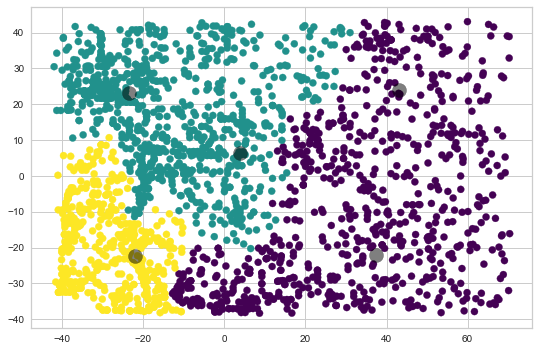

In [34]:
y_pred = heir_clustering.fit_predict(pca_dataset)
plt.scatter(pca_dataset[:, 0], pca_dataset[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Plotting Clusters in a 5 dimensional plane

In [35]:
mk_size = dataset_os['HDL']/12
mk_color = dataset_os['isBlack']


fig1 = go.Scatter3d(x=dataset_os['Age'], y=dataset_os['Systolic'], z=dataset_os['Risk'], marker=dict(size=mk_size,
                                color=mk_color, opacity=0.9, reversescale=True,
                                colorscale='Blues'),
                    line=dict(width=0.02),
                    mode='markers')

mylayout = go.Layout(scene=dict(xaxis=dict( title='Age'),
                                yaxis=dict( title='Systolic'),
                                zaxis=dict(title='Risk')),)

plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("5D Plot.html"))

'5D Plot.html'

# Part - 3 Decision Tree

### Important Functions for metrics calculation

In [36]:
scoring = {'acc': 'accuracy', 'prec_macro': 'precision_macro', 'rec_micro': 'recall_macro'}
dataset_x = dataset_os_2_x
dataset_y = dataset_os_2_y

def cv_score(score):
    print('Mean accuracy of the model is: {:0.2f}%'.format(mean(score['test_acc']*100)))
    print('Precision of the model is: {:0.2f}%'.format(mean(score['test_prec_macro']*100)))
    print('Recall of the model is: {:0.2f}%'.format(mean(score['test_rec_micro']*100)))
    
def roc_plot(dataset_y, model, x_test, y_test):
    false_positive_rate = {}
    true_positive_rate = {}
    thresh ={}
    n_classes = dataset_y.nunique()
    total = np.zeros(n_classes-1, dtype = 'object')
    y_proba = model.predict_proba(x_test)
    color = ['darkgreen', 'darkorange', 'mediumslateblue']

    for i in range(3):    
        false_positive_rate[i], true_positive_rate[i], thresh[i] = roc_curve(y_test, y_proba[:,i], pos_label=i)
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle=':',color = color[i], label=('Class '+str(i+1)))
        total[0] += false_positive_rate[i]
        total[1] += true_positive_rate[i]

    total[0] /= 3
    total[1] /= 3
    plt.plot(total[0], total[1], linestyle='-',color = 'red', label=('Overall Accuracy'))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc='best')
    
def score_summary(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    print("The accuray of the model is: {:0.2f}%".format(accuracy * 100))
    print("The model's Precision is: {:0.2f}%".format(precision * 100))
    print("The model's Recall is: {:0.2f}%".format(recall * 100))
    print("The model's F-Score is: {:0.2f}%".format(f_score * 100))

Defined a few functions for printing various evaluation metrics to avoid repetition of code multiple times

### Testing on Training Set

In [37]:
dec_tree = DecisionTreeClassifier().fit(dataset_x, dataset_y)
y_pred = dec_tree.predict(dataset_x)
score_summary(dataset_y, y_pred)
# roc_plot(dataset_y, dec_tree, dataset_x, dataset_y)

The accuray of the model is: 100.00%
The model's Precision is: 100.00%
The model's Recall is: 100.00%
The model's F-Score is: 100.00%


In [38]:
features = dataset_x.columns
tree.export_graphviz(dec_tree, feature_names=features, out_file="heart_risk_tree_no.dot",filled=True)
(graph,) = pydot.graph_from_dot_file('heart_risk_tree_no.dot')
graph.write_png('heart_risk_tree_no.png')

In [39]:
score = cross_validate(DecisionTreeClassifier(random_state = 400), dataset_x, dataset_y, cv=10, scoring = scoring)
cv_score(score)

Mean accuracy of the model is: 87.41%
Precision of the model is: 87.60%
Recall of the model is: 87.36%


### Testing on Test Set

In [40]:
x_train , x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size = 0.3, random_state = 32)
dec_tree = DecisionTreeClassifier(random_state = 32)
dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)
score_summary(y_test, y_pred)
# roc_plot(dataset_y, dec_tree, x_test, y_test)

The accuray of the model is: 85.25%
The model's Precision is: 85.42%
The model's Recall is: 85.25%
The model's F-Score is: 85.28%


The tree does generalize well to new data because the accuracy is close 85% which is the accuracy that we got when using only training data. Though this model seems overfitted due to the higher accuracy.

### Tuning Hyperparameters for Decision Tree

In [41]:
dec_tree = DecisionTreeClassifier(min_samples_split = 5, max_leaf_nodes = 10, random_state = 40, max_features = 'auto', max_depth = 5)
sts = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=32)
score = cross_validate(dec_tree, dataset_x, dataset_y, cv=sts, scoring = scoring)
cv_score(score)

Mean accuracy of the model is: 73.13%
Precision of the model is: 73.36%
Recall of the model is: 73.01%


Modifying the hyperaparmeters of the tree drastically reduced the tree size. Without tuning, the original tree grew huge laterally with multiple condition which suggest overfitting. Reducing the max depth to 5 gave me the same accuracy as using larger number. Also using this reduced the tree size to a good amount and generalized well to new data. This is computaionally efficient as there are not way less number of nodes.

### Printing the Tree to a PNG file

In [42]:
features = dataset_x.columns
dec_tree.fit(dataset_x, dataset_y)
tree.export_graphviz(dec_tree, feature_names=features, out_file="heart_risk_tree.dot",filled=True)
(graph,) = pydot.graph_from_dot_file('heart_risk_tree.dot')
graph.write_png('heart_risk_tree.png')

### Running model with 30% Test Set

In [43]:
sts = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=32)
score = cross_validate(dec_tree, dataset_x, dataset_y, cv=sts, scoring = scoring)
cv_score(score)

Mean accuracy of the model is: 73.13%
Precision of the model is: 73.36%
Recall of the model is: 73.01%


### Running model with 60% Test Set

In [44]:
sts = StratifiedShuffleSplit(n_splits=10, test_size=0.6, random_state=32)
score = cross_validate(dec_tree, dataset_x, dataset_y, cv=sts, scoring = scoring)
cv_score(score)

Mean accuracy of the model is: 72.64%
Precision of the model is: 73.22%
Recall of the model is: 72.53%


Tuning the hyperparams of the tree majorly removed overfitting. Before tuning I got an accuracy of 85%, but after tuning, the size of the tree reduced drastically and the accuracy dipped to approx 72% which implies that the model has generalized decently to new data and at the same time not overfitted.

### Random Forest

### Test on Training set

In [45]:
r_forest = RandomForestClassifier(max_depth=2, random_state=40)
r_forest.fit(dataset_x, dataset_y)
y_pred = r_forest.predict(dataset_x)
score_summary(dataset_y, y_pred)

The accuray of the model is: 74.49%
The model's Precision is: 73.83%
The model's Recall is: 74.49%
The model's F-Score is: 73.80%


In [46]:
r_forest = RandomForestClassifier(max_depth=2, random_state=40)
score = cross_validate(r_forest, dataset_x, dataset_y, cv=10, scoring = scoring)
cv_score(score)

Mean accuracy of the model is: 74.03%
Precision of the model is: 73.52%
Recall of the model is: 73.87%


Compared to Decision Tree, Random forest avoids overfitting from the start even if trained and tested without test data. This 74% accuracy is constant even after varying parameters and changing the test train splits. Thus random forest seems to be a better model than decision tree for my dataset at the cost of some accuracy.

### Test on Testing set

In [47]:
r_forest = RandomForestClassifier(max_depth=2, random_state=40)
r_forest.fit(x_train, y_train)
y_pred = r_forest.predict(x_test)
score_summary(y_test, y_pred)

The accuray of the model is: 72.81%
The model's Precision is: 71.95%
The model's Recall is: 72.81%
The model's F-Score is: 71.85%


In [48]:
r_forest = RandomForestClassifier(max_depth=2, random_state=40)
sts = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=32)
score = cross_validate(r_forest, dataset_x, dataset_y, cv=sts, scoring = scoring)
cv_score(score)

Mean accuracy of the model is: 74.58%
Precision of the model is: 73.83%
Recall of the model is: 74.41%


### Running model with 60% test

In [49]:
r_forest = RandomForestClassifier(max_depth=2, random_state=40)
sts = StratifiedShuffleSplit(n_splits=10, test_size=0.6, random_state=32)
score = cross_validate(r_forest, dataset_x, dataset_y, cv=sts, scoring = scoring)
cv_score(score)

Mean accuracy of the model is: 74.14%
Precision of the model is: 73.46%
Recall of the model is: 73.96%


# Part 4 Linear Classifier and Neural Networks

### Logistic Regression without cross validation

In [50]:
model_svm = SVC()
model_svm.fit(dataset_x, dataset_y)
y_pred = model_svm.predict(dataset_x)
score_summary(dataset_y, y_pred)

The accuray of the model is: 82.70%
The model's Precision is: 82.93%
The model's Recall is: 82.70%
The model's F-Score is: 82.66%


The data is not linearly separable because we dont get close to a 100% accuracy from SVM. SVM is a linear classifier and should give perfect accuracy if the data is linearly serparable. Thus my data is not linearly separable.

### Logistic Regression with 10 Fold Cross Validation

In [52]:
sts = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=32)
score = cross_validate(model_svm, dataset_x, dataset_y, cv=sts, scoring = scoring)
cv_score(score)

Mean accuracy of the model is: 81.38%
Precision of the model is: 81.43%
Recall of the model is: 81.28%


### Neural Network

In [53]:
model_ann = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(5, 10), random_state=30, max_iter = 2000, shuffle = True, verbose = True)
model_ann.fit(x_train, y_train)
y_pred = model_ann.predict(x_train)
score_summary(y_train, y_pred)

Iteration 1, loss = 1.01562597
Iteration 2, loss = 0.99309135
Iteration 3, loss = 0.97202131
Iteration 4, loss = 0.95248509
Iteration 5, loss = 0.93371114
Iteration 6, loss = 0.91627100
Iteration 7, loss = 0.90028377
Iteration 8, loss = 0.88404273
Iteration 9, loss = 0.86862674
Iteration 10, loss = 0.85340076
Iteration 11, loss = 0.83902847
Iteration 12, loss = 0.82443075
Iteration 13, loss = 0.81022818
Iteration 14, loss = 0.79651187
Iteration 15, loss = 0.78305853
Iteration 16, loss = 0.77004192
Iteration 17, loss = 0.75753055
Iteration 18, loss = 0.74530040
Iteration 19, loss = 0.73370915
Iteration 20, loss = 0.72242822
Iteration 21, loss = 0.71187731
Iteration 22, loss = 0.70185906
Iteration 23, loss = 0.69205949
Iteration 24, loss = 0.68288324
Iteration 25, loss = 0.67416666
Iteration 26, loss = 0.66600982
Iteration 27, loss = 0.65804354
Iteration 28, loss = 0.65059056
Iteration 29, loss = 0.64363379
Iteration 30, loss = 0.63682302
Iteration 31, loss = 0.63050298
Iteration 32, los

Iteration 268, loss = 0.42174790
Iteration 269, loss = 0.42161190
Iteration 270, loss = 0.42140703
Iteration 271, loss = 0.42127938
Iteration 272, loss = 0.42109289
Iteration 273, loss = 0.42081528
Iteration 274, loss = 0.42083466
Iteration 275, loss = 0.42062744
Iteration 276, loss = 0.42042120
Iteration 277, loss = 0.42039425
Iteration 278, loss = 0.42017765
Iteration 279, loss = 0.42001924
Iteration 280, loss = 0.41972261
Iteration 281, loss = 0.41969151
Iteration 282, loss = 0.41961086
Iteration 283, loss = 0.41970020
Iteration 284, loss = 0.41924171
Iteration 285, loss = 0.41966511
Iteration 286, loss = 0.41898535
Iteration 287, loss = 0.41871549
Iteration 288, loss = 0.41856920
Iteration 289, loss = 0.41841697
Iteration 290, loss = 0.41892473
Iteration 291, loss = 0.41862581
Iteration 292, loss = 0.41817342
Iteration 293, loss = 0.41793834
Iteration 294, loss = 0.41781718
Iteration 295, loss = 0.41776090
Iteration 296, loss = 0.41764003
Iteration 297, loss = 0.41745484
Iteration 

In [54]:
ann = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(5, 10), random_state=30, max_iter = 2000, shuffle = True, verbose = True)
ann.fit(x_train, y_train)
y_pred = ann.predict(x_test)
score_summary(y_test, y_pred)

Iteration 1, loss = 1.01562597
Iteration 2, loss = 0.99309135
Iteration 3, loss = 0.97202131
Iteration 4, loss = 0.95248509
Iteration 5, loss = 0.93371114
Iteration 6, loss = 0.91627100
Iteration 7, loss = 0.90028377
Iteration 8, loss = 0.88404273
Iteration 9, loss = 0.86862674
Iteration 10, loss = 0.85340076
Iteration 11, loss = 0.83902847
Iteration 12, loss = 0.82443075
Iteration 13, loss = 0.81022818
Iteration 14, loss = 0.79651187
Iteration 15, loss = 0.78305853
Iteration 16, loss = 0.77004192
Iteration 17, loss = 0.75753055
Iteration 18, loss = 0.74530040
Iteration 19, loss = 0.73370915
Iteration 20, loss = 0.72242822
Iteration 21, loss = 0.71187731
Iteration 22, loss = 0.70185906
Iteration 23, loss = 0.69205949
Iteration 24, loss = 0.68288324
Iteration 25, loss = 0.67416666
Iteration 26, loss = 0.66600982
Iteration 27, loss = 0.65804354
Iteration 28, loss = 0.65059056
Iteration 29, loss = 0.64363379
Iteration 30, loss = 0.63682302
Iteration 31, loss = 0.63050298
Iteration 32, los

Iteration 269, loss = 0.42161190
Iteration 270, loss = 0.42140703
Iteration 271, loss = 0.42127938
Iteration 272, loss = 0.42109289
Iteration 273, loss = 0.42081528
Iteration 274, loss = 0.42083466
Iteration 275, loss = 0.42062744
Iteration 276, loss = 0.42042120
Iteration 277, loss = 0.42039425
Iteration 278, loss = 0.42017765
Iteration 279, loss = 0.42001924
Iteration 280, loss = 0.41972261
Iteration 281, loss = 0.41969151
Iteration 282, loss = 0.41961086
Iteration 283, loss = 0.41970020
Iteration 284, loss = 0.41924171
Iteration 285, loss = 0.41966511
Iteration 286, loss = 0.41898535
Iteration 287, loss = 0.41871549
Iteration 288, loss = 0.41856920
Iteration 289, loss = 0.41841697
Iteration 290, loss = 0.41892473
Iteration 291, loss = 0.41862581
Iteration 292, loss = 0.41817342
Iteration 293, loss = 0.41793834
Iteration 294, loss = 0.41781718
Iteration 295, loss = 0.41776090
Iteration 296, loss = 0.41764003
Iteration 297, loss = 0.41745484
Iteration 298, loss = 0.41742059
Iteration 

Activation functions play vital role in the final accuracy and loss. Using sigmoid sometimes led to the problem of vanishing gradients during back propagation. tanh seemed to work better than sigmoid in terms of converging to a lower loss. Finally ReLU worked as the best activation function, its easy to calculate and gave overall better higher accuracy and lower loss as compared to to other activation functions.

### CNN

In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
xtrain = train_datagen.flow_from_directory(r'C:\Users\harsh\Desktop\Masters_Data_Science\dmml_project\heart_riks\Chess\train', target_size=(64,64), batch_size=16, class_mode='categorical')
xtest = test_datagen.flow_from_directory(r'C:\Users\harsh\Desktop\Masters_Data_Science\dmml_project\heart_riks\Chess\test', target_size=(64,64), batch_size=16, class_mode='categorical')
cnn_model=Sequential()
cnn_model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=40,activation='relu'))
cnn_model.add(Dense(units=6, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model.fit_generator(xtrain, steps_per_epoch=((458//16)+1), epochs=100, validation_data=xtest, validation_steps=40)

Found 458 images belonging to 6 classes.
Found 94 images belonging to 6 classes.


C:\Users\harsh\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/100
29/29 [==============================] - 9s 284ms/step - loss: 2.5245 - accuracy: 0.1834 - val_loss: 1.8289 - val_accuracy: 0.1809
Epoch 2/100
29/29 [==============================] - 7s 236ms/step - loss: 1.7535 - accuracy: 0.2380
Epoch 3/100
29/29 [==============================] - 7s 237ms/step - loss: 1.6806 - accuracy: 0.3079
Epoch 4/100
29/29 [==============================] - 7s 236ms/step - loss: 1.5938 - accuracy: 0.3493
Epoch 5/100
29/29 [==============================] - 7s 240ms/step - loss: 1.5342 - accuracy: 0.3712
Epoch 6/100
29/29 [==============================] - 7s 245ms/step - loss: 1.4733 - accuracy: 0.4541
Epoch 7/100
29/29 [==============================] - 7s 246ms/step - loss: 1.4060 - accuracy: 0.4323
Epoch 8/100
29/29 [==============================] - 7s 244ms/step - loss: 1.3781 - accuracy: 0.4825
Epoch 9/100
29/29 [==============================] - 7s 252ms/step - loss: 1.3203 - accuracy: 0.4869
Epoch 10/100
29/29 [=============================

## Part 5 Research question

Research Question

While implementing ANN and CNN, I came across a particular problem that causes problems to many people and it is figuring out the learning rate to be used. If the learning rate is too high, the loss will not converge and model will return random accuracies. If the learning rate is too small, the model will take exponentially longer to converge to a lower loss. Rerunning the model everytime with different learning rates is not computationally feasible because with large datasets and complex neural networks, this can easily take a very very long time. Thus it is imperative to find a way to estimate the learning rate before starting our experiments so that we can have a better model in a shorter amount of time and in the most efficient manner.

Methodology to solve the problem

To implement this, we need a way to run the ANN or CNN at different values of learning rates and record the losses given by each different learning rate. We define our range of learning rate from 1e-07 to 1e+1 which covers majority of the learning rate values used by models. Then we iterate through each of the learning rate and plot the corresponding loss. Then we look until we find a sharp dip in the loss with change in learning rate. This can be easily calculated by taking the derivative of the loss vs learning rate. Our estimated learning rate should be present where there is highest decrease in loss with a small change in learning rate.

There is a library that does this currently called fastai. It is the library I have used to estimate the learning rate.

### Learning Rate Estimation

### Generating Labels for each train and test for learning rate optimisation

In [78]:
data = []
for folder in sorted(os.listdir('Chess/train')):
    for file in sorted(os.listdir('Chess/train/'+folder)):
        data.append((folder, file))

df_train = pd.DataFrame(data, columns=['Folder', 'File'])

data = []
for folder in sorted(os.listdir('Chess/test')):
    for file in sorted(os.listdir('Chess/test/'+folder)):
        data.append((folder, file))

df_test = pd.DataFrame(data, columns=['Folder', 'File'])

In [79]:
combined = [df_train, df_test]
result = pd.concat(combined)
result.shape
result['name'] = 'train\\' + result['Folder'].astype(str) + '\\' + result['File']
category = LabelEncoder()
result['label'] = category.fit_transform(result['Folder'])
result.drop(labels=['Folder', 'File'], axis = 1, inplace=True)
result.to_csv(r'C:/Users/harsh/Desktop/Masters_Data_Science/dmml_project/heart_riks/Chess/labels.csv', index=False)

In [82]:
data = ImageDataBunch.from_csv(r'C:/Users/harsh/Desktop/Masters_Data_Science/dmml_project/heart_riks/Chess/', size=28)
learn = Learner(data, simple_cnn((3,64,64,6)), metrics=[accuracy])
learn.lr_find(stop_div=False, num_it=200)

C:\Users\harsh\Anaconda3\lib\site-packages\torch\nn\functional.py:3679: UserWarning:

The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 

C:\Users\harsh\Anaconda3\lib\site-packages\torch\nn\functional.py:3679: UserWarning:

The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 

C:\Users\harsh\Anaconda3\lib\site-packages\torch\nn\functional.py:3679: UserWarning:

The default behavior for interpolate/upsample with

C:\Users\harsh\Anaconda3\lib\site-packages\torch\nn\functional.py:3679: UserWarning:

The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 

C:\Users\harsh\Anaconda3\lib\site-packages\torch\nn\functional.py:3679: UserWarning:

The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 

C:\Users\harsh\Anaconda3\lib\site-packages\torch\nn\functional.py:3679: UserWarning:

The default behavior for interpolate/upsample with

C:\Users\harsh\Anaconda3\lib\site-packages\torch\nn\functional.py:3679: UserWarning:

The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 

C:\Users\harsh\Anaconda3\lib\site-packages\torch\nn\functional.py:3679: UserWarning:

The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 

C:\Users\harsh\Anaconda3\lib\site-packages\torch\nn\functional.py:3679: UserWarning:

The default behavior for interpolate/upsample with

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "C:\Users\harsh\Anaconda3\lib\multiprocessing\queues.py", line 235, in _feed
    close()
  File "C:\Users\harsh\Anaconda3\lib\multiprocessing\connection.py", line 177, in close
    self._close()
  File "C:\Users\harsh\Anaconda3\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\harsh\Anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\harsh\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\harsh\Anaconda3\lib\multiprocessing\queues.py", line 266, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times


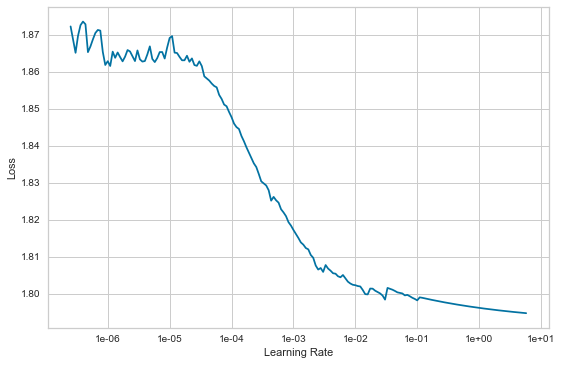

In [83]:
learn.recorder.plot()

Solution to the problem

From this graph we can see that there is a sharp decrease in the loss when the learning rate is between 1e-05 and 1e-03. This tells us that a value of learning rate between these values would be a good starting point.